# Video Game Sales

`vgsales.csv` 파일을 읽어 데이터프레임 객체로 변환한 후 아래 문제들을 해결해보시오.

---
### Ref.
https://www.kaggle.com/code/upadorprofzs/eda-video-game-sales/

---

문제 1. 데이터 구조 파악
- 데이터의 행 수, 열 수를 출력하시오.
- 결측치가 있는 컬럼을 찾아 개수를 함께 출력하시오.

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('vgsales.csv')
print(df.shape)
print(df.index)
print(df.columns)
print(df.isnull().sum())

(16598, 11)
RangeIndex(start=0, stop=16598, step=1)
Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')
Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


문제 2. 연도 (Year) 컬럼 정리
- Year 컬럼의 최소값, 최대값, 가장 많이 등장하는 연도를 각각 구하시오.
- 출시 연도가 없는 데이터를 제거한 새로운 데이터 프레임을 만드시오.

In [2]:
연도_max_agg = df['Year'].agg('max')
연도_min_agg = df['Year'].agg('min')
연도_최빈값 = df['Year'].mode()[0]

print(f'최대값 : {연도_max_agg}')
print(f'최소값 : {연도_min_agg}')
print(f'최빈값 : {연도_최빈값}')

# df['Year'].dropna()
print(f'결축치 제거 : {df["Year"].isnull().sum()}')

최대값 : 2020.0
최소값 : 1980.0
최빈값 : 2009.0
결축치 제거 : 271


문제 3. 주요 컬럼의 고유값 탐색
- Platform, Genre, Publisher 각각 어떤 값들이 있는 지 고유값 목록을 출력하시오.
- Genre는 총 몇 종류인지 구하시오.

In [3]:
플랫폼 = df.drop_duplicates(subset='Platform')
print(플랫폼['Platform'].unique())
장르 = df.drop_duplicates(subset='Genre')
print(장르['Genre'].unique())
제작회사 = df.drop_duplicates(subset='Publisher')
print(제작회사['Publisher'].unique())

print(df['Genre'].value_counts())

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'GC' 'WiiU' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']
['Nintendo' 'Microsoft Game Studios' 'Take-Two Interactive'
 'Sony Computer Entertainment' 'Activision' 'Ubisoft' 'Bethesda Softworks'
 'Electronic Arts' 'Sega' 'SquareSoft' 'Atari' '505 Games' 'Capcom'
 'GT Interactive' 'Konami Digital Entertainment'
 'Sony Computer Entertainment Europe' 'Square Enix' 'LucasArts'
 'Virgin Interactive' 'Warner Bros. Interactive Entertainment'
 'Universal Interactive' 'Eidos Interactive' 'RedOctane' 'Vivendi Games'
 'Enix Corporation' 'Namco Bandai Games' 'Palcom' 'Hasbro Interactive'
 'THQ' 'Fox Interactive' 'Acclaim Entertainment' 'MTV Games'
 'Disney Interactive Studios' nan 'Majesco Entertainment' 'Codemasters'
 'Red Orb' 'Level 5' 'Arena 

문제 4. 연도별 게임 출시 수
- 연도별 게임 출시 갯수를 구하고, 연도 오름차순으로 정렬하시오.
- 위 데이터를 선 그래프로 시각화하시오.

Year
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     349
2001.0     482
2002.0     829
2003.0     775
2004.0     763
2005.0     941
2006.0    1008
2007.0    1202
2008.0    1428
2009.0    1431
2010.0    1259
2011.0    1139
2012.0     657
2013.0     546
2014.0     582
2015.0     614
2016.0     344
2017.0       3
2020.0       1
Name: Name, dtype: int64
[   9   46   36   17   14   14   21   16   15   17   16   41   43   60
  121  219  263  289  379  338  349  482  829  775  763  941 1008 1202
 1428 1431 1259 1139  657  546  582  614  344    3    1]


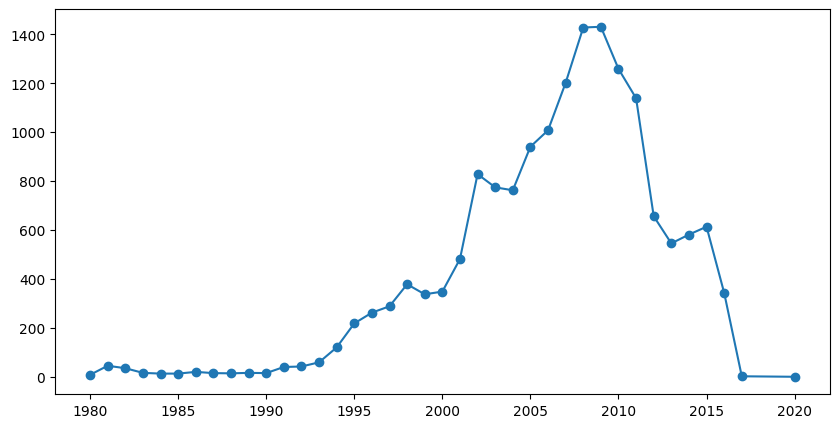

In [4]:
연도별_게임_출시_수 = df.groupby('Year')['Name'].agg('count')
print(연도별_게임_출시_수)
print(연도별_게임_출시_수.values)
연도별_게임_출시_수 = df.groupby('Year').size().sort_index()

plt.figure(figsize=(10, 5))
plt.plot(연도별_게임_출시_수.index,
         연도별_게임_출시_수.values,
         marker='o',
         label='Year'
         )


문제 5. 플랫폼별 전 세계 판매량
- 플랫폼(Platform) 별로 Global_Sales를 합산하고, 판매량이 높은 순으로 TOP 10을 막대그래프로 시각화하시오.

<BarContainer object of 10 artists>

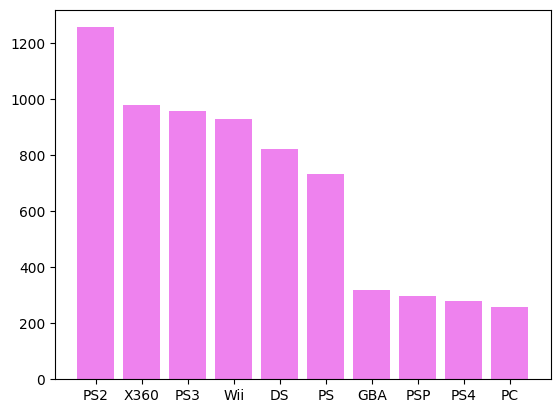

In [5]:
전_세계_판매량 = df.groupby('Platform')['Global_Sales'].agg('sum').sort_values(ascending=False)
top10 = 전_세계_판매량.head(n=10)
# print(top10)
plt.bar(
  top10.index,
  top10.values,
  color='violet'
)

# plt.xticks(rotation=40)

문제 6. 가장 많이 판매된 장르
- 장르별 Global_Sales 총합을 구해 가장 높은 장르를 찾으시오.
- 장르별 판매 비중을 파이차트로 시각화하시오.

Genre
Action    1751.18
Name: Global_Sales, dtype: float64


([<matplotlib.patches.Wedge at 0x219aaf6bcd0>,
 [Text(0.8973521183852188, 0.6362068654373045, 'Action'),
  Text(-0.1441106777751882, 1.090519194031529, 'Sports'),
  Text(-0.9045375010026173, 0.6259488072358157, 'Shooter'),
  Text(-1.0958780768510152, -0.09513800858395427, 'Role-Playing'),
  Text(-0.8370676620450599, -0.7136649978515253, 'Platform'),
  Text(-0.3111369944506704, -1.0550799830743656, 'Misc'),
  Text(0.27884736797158993, -1.0640696149102826, 'Racing'),
  Text(0.6849799645130867, -0.8606988138807039, 'Fighting'),
  Text(0.9063915788061081, -0.6232610254695626, 'Simulation'),
  Text(1.0223514342806763, -0.40595263864673203, 'Puzzle'),
  Text(1.0763964956611056, -0.22665079776716376, 'Adventure'),
  Text(1.0979086093030415, -0.06779886148204466, 'Strategy')],
 [Text(0.4894647918464829, 0.3470219266021661, '19.6%'),
  Text(-0.07860582424101174, 0.5948286512899249, '14.9%'),
  Text(-0.493384091455973, 0.3414266221286267, '11.6%'),
  Text(-0.5977516782823719, -0.0518934592276114

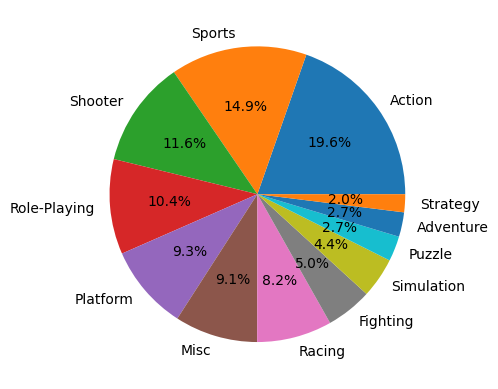

In [222]:
total_genre = df.groupby('Genre')['Global_Sales'].agg('sum').sort_values(ascending=False)
# print(total_genre)
# total_genre.dropna(subset=['Global_Sales'])
top_genre = total_genre.head(n=1)
print(top_genre)

plt.pie(total_genre, labels=total_genre.index, autopct='%1.1f%%')


문제 7. Publisher 별 평균 판매량
- Publisher 별 평균 Global_Sales를 구하고, 상위 10개만 출력하시오.

In [ ]:
제작사별_세계판매량 = df.groupby('Publisher')['Global_Sales'].agg('mean').sort_values(ascending=False)
# print(제작사별_세계판매량)
top_제작사 = 제작사별_세계판매량.head(n=10)
print(top_제작사)

# df.groupby('Publisher')['Global_Sales'].mean().sort_values(ascending=False)
# top10_pub_mean = pub_mean.head(10)
# top10_pub_mean

# TODO : 최소 5개 이상 발매한 Publisher만 인정

Publisher
Palcom                                4.170000
Red Orb                               2.620000
Nintendo                              2.541337
Arena Entertainment                   2.360000
UEP Systems                           2.250000
RedOctane                             2.170000
Valve                                 1.740000
Hello Games                           1.600000
Sony Computer Entertainment Europe    1.592667
Westwood Studios                      1.550000
Name: Global_Sales, dtype: float64


NameError: name 'pub_mean' is not defined

문제 8. 특정 Publisher 집중 분석
- `Nintendo` 또는 `Electronic Arts` 중 하나를 선택하여, 연도별 Global_Sales 추세를 선 그래프로 나타내시오.

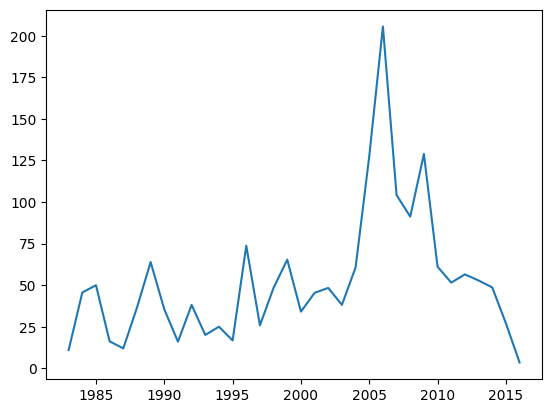

In [ ]:
# df['Publisher'] == 'Nintendo'

# 닌텐도 = np.where(df['Publisher'] == 'Nintendo')


# plt.plot(df['Global_Sales'],
#          df['Year'],
#          marker='o',
#          label='Global_Sales'
#          )

publisher = 'Nintendo'

pub_df = df[df['Publisher'] == publisher]

sales_by_year = pub_df.groupby('Year')['Global_Sales'].sum().sort_index()

plt.figure()
plt.plot(sales_by_year)

문제 9. Publisher 별 가장 많이 발매한 장르
- 각 Publisher가 가장 많이 만든 장르는 무엇인지 구하시오. (Publisher 별로 Genre count의 최대값 찾기)

[hint]
`groupby(['Publisher', 'Genre']).size().reset_index()`

In [15]:
# Publisher, Genre 조합하여 발매 수
df_pg = df.groupby(['Publisher', 'Genre']).size().reset_index(name='count')

# 각 Publisher 별 발매수가 가장 많은 Genre 조회
idx = df_pg.groupby('Publisher')['count'].idxmax()
# => 각 Publisher 별 발매수(count)가 가장 큰 값을 가진 행의 인덱스
df_pg_result = df_pg.loc[idx].sort_values('count', ascending=False).reset_index(drop=True)

df_pg_result.head(10)


,Publisher,Genre,count
0,Electronic Arts,Sports,561
1,Activision,Action,310
2,Konami Digital Entertainment,Sports,280
3,Namco Bandai Games,Action,248
4,THQ,Action,194
5,Ubisoft,Action,193
6,Warner Bros. Interactive Entertainment,Action,165
7,Capcom,Action,154
8,Take-Two Interactive,Sports,151
9,Tecmo Koei,Action,137


문제 10. 지역별 판매량 비교
- NA_Sales, EU_Sales, JP_Sales, Other_Sales 전 세계 합을 비교하여 그래프로 표현하시오.

Text(0.5, 1.0, '지역별 총 판매량 (pie)')

C:\Users\user1\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\user1\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50669 (\N{HANGUL SYLLABLE YEOG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\user1\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:82: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\user1\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:82: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\user1\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:82: UserWarning: Glyph 54032 (\N{HANGUL SYLLABLE PAN}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\User

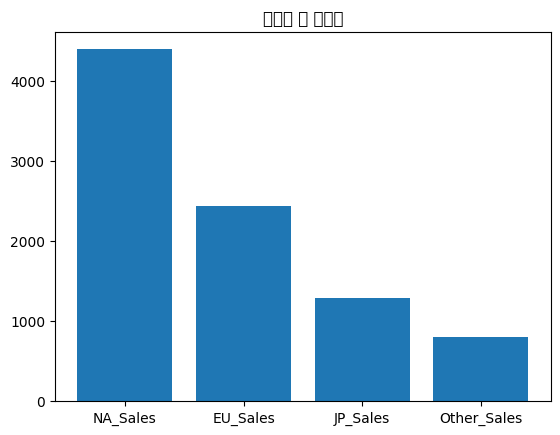

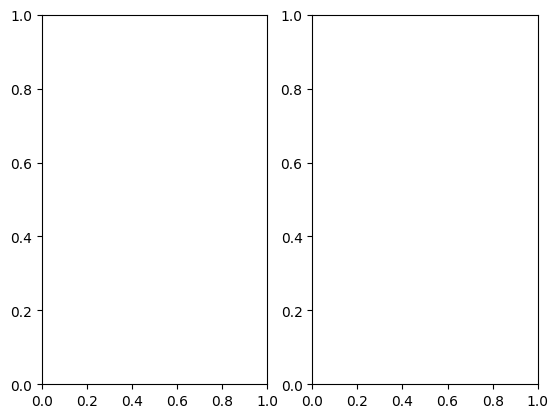

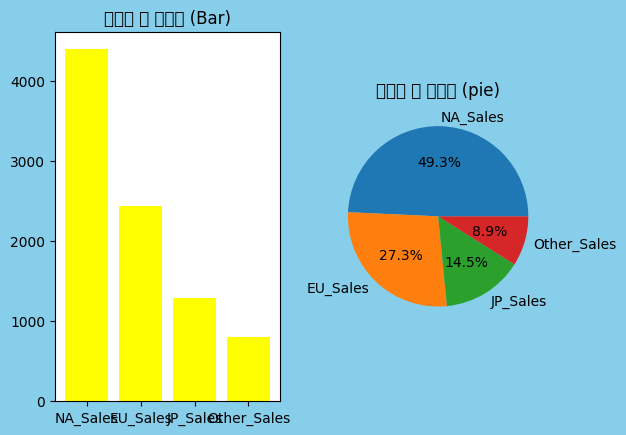

In [26]:
# 각 컬럼(지역)별 총합
region_sum = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# pie, bar

#simple version
plt.figure()
plt.title('지역별 총 판매량')
plt.bar(x=region_sum.index, height=region_sum)

plt.subplots(nrows=1, ncols=2)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

# 컨테이너 배경색 설정
fig.set_facecolor('skyblue')

# bar 그래프 표시
ax1.bar(x=region_sum.index, height=region_sum, color='yellow')
ax1.set_title('지역별 총 판매량 (Bar)')

# pie 차트 표시
ax2.pie(region_sum, autopct='%1.1f%%', labels=region_sum.index)
ax2.set_title('지역별 총 판매량 (pie)')

문제 11. 국가별로 인기 있는 장르
- NA / EU / JP 각각 판매량이 가장 높은 장르를 구하시오.

In [ ]:
# NA 국가의 판매량이 높은 경로
na_top = df.groupby('Genre')['NA_Sales'].sum().solt_vales(ascendin = False).head(1)

# EU 국가의 판매량이 높은 경로
eu_top = df.groupby('Genre')['EU_Sales'].sum().solt_vales(ascendin = False).head(1)

# JP 국가의 판매량애 높은 경로
jp_top = df.groupby('Genre')['ㅓㅖ_Sales'].sum().solt_vales(ascendin = False).head(1)


AttributeError: 'DataFrame' object has no attribute 'groupb'

문제 12. 연도 + 장르 + 플랫폼 종합 분석
- 특정 장르를 선택하여 
    - 연도별 출시 수
    - 플랫폼별 판매량 TOP5 
    를 각각 그래프로 시각화 하시오
- 결과를 확인하여 해당 장르의 트렌드를 3문장으로 정리하시오.